In [4]:

from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading data

In [5]:
base_path = '/kaggle/input/plant-village-dataset-updated/Apple/Train'

In [14]:

classes = os.listdir(base_path)

num_images = []
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    num_images = len(glob(os.path.join(class_path, "*.JPG")))
    print(f"Class: {class_name}, Number of Images: {num_images}")
    

Class: Healthy, Number of Images: 2008
Class: Apple Scab, Number of Images: 2016
Class: Cedar Apple Rust, Number of Images: 1760
Class: Black Rot, Number of Images: 1987


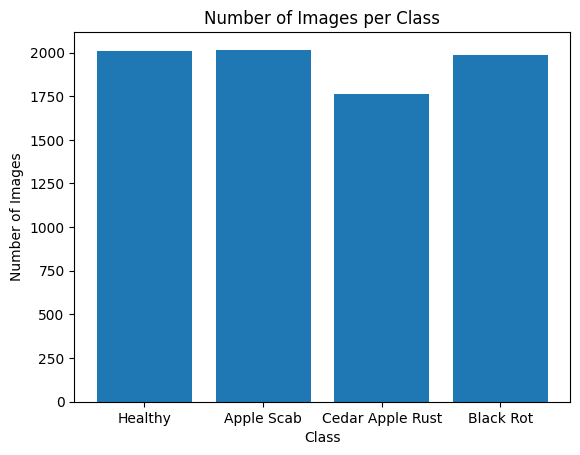

In [12]:
num_images = []
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    num_images.append(len(glob(os.path.join(class_path, "*.JPG"))))

# Create a bar plot
plt.bar(classes, num_images)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

### Sample Images

Samples images for category Apple Scab


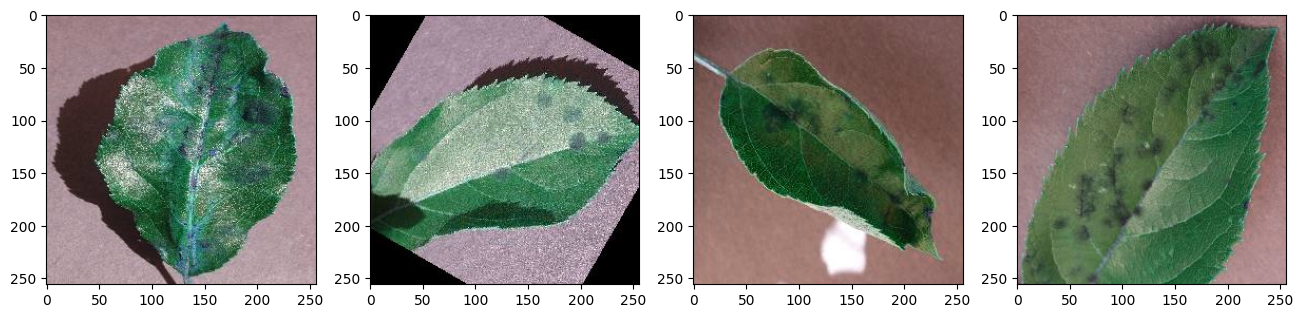

Samples images for category Black Rot


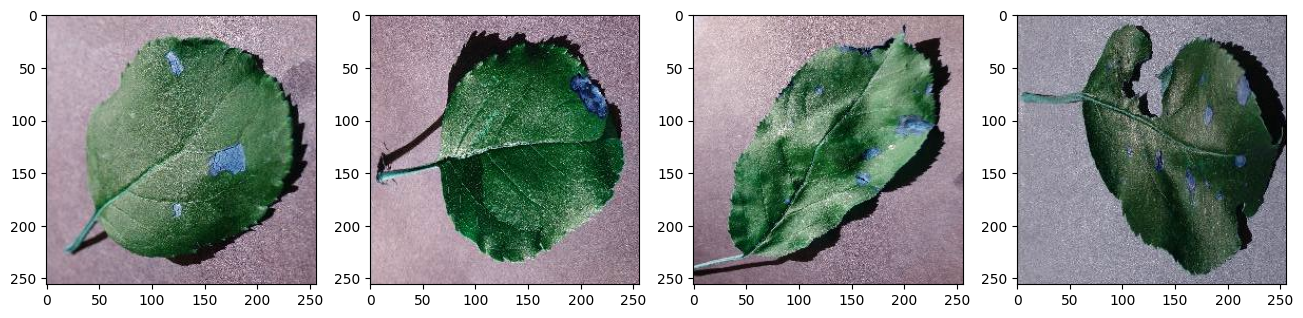

Samples images for category Cedar Apple Rust


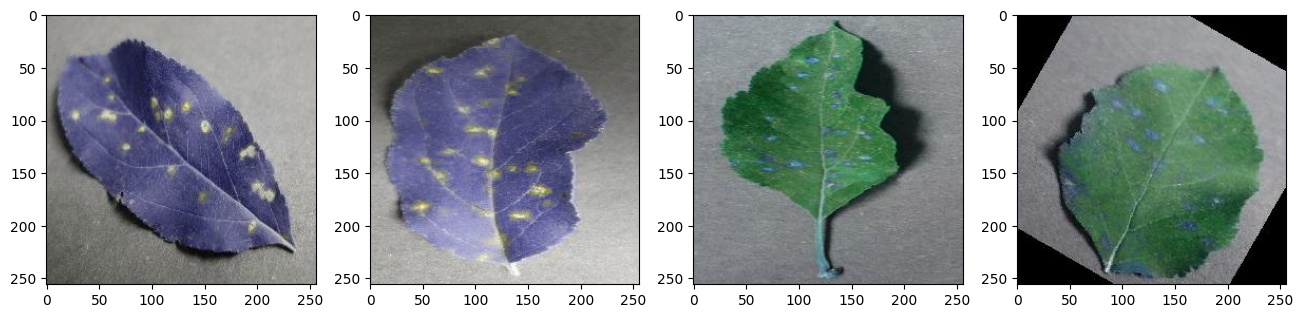

Samples images for category Healthy


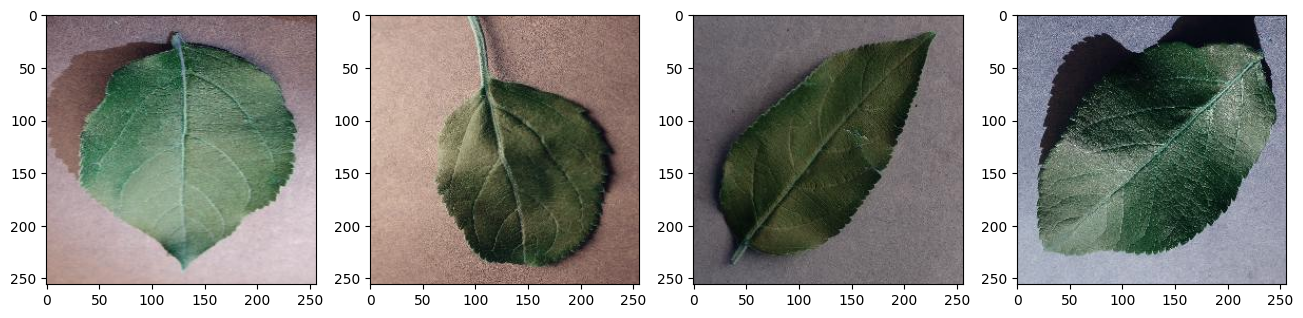

In [15]:
def plot_samples(category):
    if category not in classes:
        print("Invalid category!")
        return
    print("Samples images for category " + category)
    img_path = base_path + "Train/" + category + '/**'
    path_contents = glob(img_path, recursive=True)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 4)
    plt.subplot(141)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(142)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(143)
    plt.imshow(cv2.imread(imgs[2]))
    plt.subplot(144)
    plt.imshow(cv2.imread(imgs[3]))
    plt.show()
    return

plot_samples('Apple Scab')
plot_samples('Black Rot')
plot_samples('Cedar Apple Rust')
plot_samples('Healthy')



In [10]:
# set the paths to the train, test, and validation data
train_dir = '/kaggle/input/plant-village-dataset-updated/Apple/Train/'
test_dir = '/kaggle/input/plant-village-dataset-updated/Apple/Test/'
val_dir = '/kaggle/input/plant-village-dataset-updated/Apple/Val'

In [11]:
# set the image size and batch size
img_size = (256, 256)
batch_size = 32

In [12]:
# use the ImageDataGenerator to rescale the images and apply data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# create the train, test, and validation generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 7771 images belonging to 4 classes.
Found 196 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.


In [16]:
# build and train the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

# Add convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))

# Add max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add an output layer with softmax activation and number of units equal to the number of classes
model.add(Dense(4, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
%%time
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
243/243 [==============================] - 180s 709ms/step - loss: 0.7333 - accuracy: 0.7627 - val_loss: 0.7189 - val_accuracy: 0.7756
Epoch 2/10
 10/243 [>.............................] - ETA: 1:43 - loss: 0.6241 - accuracy: 0.7500

KeyboardInterrupt: 